In [1]:
# make 100 cuneiform svg characters with flat

In [2]:
!pip install flat

In [3]:
import os.path

In [4]:
from flat import document, shape, rgba

In [5]:
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

In [6]:
!pip install https://github.com/aparrish/bezmerizing/archive/master.zip

  Using cached https://github.com/aparrish/bezmerizing/archive/master.zip


In [7]:
from bezmerizing import Polyline

In [8]:
import numpy as np

In [9]:
from numpy.random import uniform, normal, choice

In [10]:
np.linspace([0, 50], [40, 10], 7)

array([[ 0.        , 50.        ],
       [ 6.66666667, 43.33333333],
       [13.33333333, 36.66666667],
       [20.        , 30.        ],
       [26.66666667, 23.33333333],
       [33.33333333, 16.66666667],
       [40.        , 10.        ]])

In [11]:
p = Polyline(np.linspace([10, 50], [90, 50], 10))

In [12]:
p.fancy_curve(thicknesses=[5, 2, 1, 0.5])

Polyline([[18.8889, 47.5000], [20.6667, 47.6098], [22.4444, 47.7195], [24.2222, 47.8293], [26.0000, 47.9390], [27.7778, 48.0488], [27.7778, 48.1585], [29.5556, 48.2683], [31.3333, 48.3780], [33.1111, 48.4878], [34.8889, 48.5976], [36.6667, 48.7073], [36.6667, 48.8171], [38.4444, 48.9268], [40.2222, 49.0122], [42.0000, 49.0488], [43.7778, 49.0854], [45.5556, 49.1220], [45.5556, 49.1585], [47.3333, 49.1951], [49.1111, 49.2317], [50.8889, 49.2683], [52.6667, 49.3049], [54.4444, 49.3415], [54.4444, 49.3780], [56.2222, 49.4146], [58.0000, 49.4512], [59.7778, 49.4878], [61.5556, 49.5122], [63.3333, 49.5305], [63.3333, 49.5488], [65.1111, 49.5671], [66.8889, 49.5854], [68.6667, 49.6037], [70.4444, 49.6220], [72.2222, 49.6402], [72.2222, 49.6585], [74.0000, 49.6768], [75.7778, 49.6951], [77.5556, 49.7134], [79.3333, 49.7317], [81.1111, 49.7500], [81.1111, 50.2500], [79.3333, 50.2683], [77.5556, 50.2866], [75.7778, 50.3049], [74.0000, 50.3232], [72.2222, 50.3415], [72.2222, 50.3598], [70.4444, 

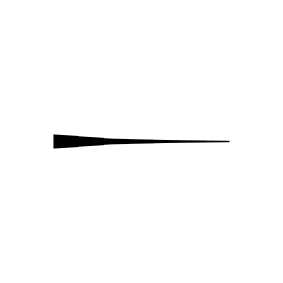

In [13]:
d = document(100, 100, 'mm')
page = d.addpage()
brush = shape().nostroke().fill(rgba(0, 0, 0, 255))
page.place(brush.polygon(p.fancy_curve(thicknesses=[5, 2, 1, 0.5])))
show(page)

In [14]:
from itertools import product
import random
all_positions = list(product(range(4), range(4)))


In [15]:
cds = list(product(range(4), range(4))) 
lns = list(product(cds, cds)) 
ln_p = np.ones(len(lns)) 
for i, ln in enumerate(lns): 
    if ln[0][0] == ln[1][0]: # if x coords are the same
        ln_p[i] += 5 
    if ln[0] == ln[1]: # if beg/end are the same
        ln_p[i] = 0 
ln_p /= ln_p.sum() # normalize
lns[np.random.choice(np.arange(len(lns)), p=ln_p)]

((3, 2), (0, 2))

In [16]:
save_path = "../Codex/_project/_images/glyphs/"
for i in range(800):
    lines = []
    linenumber = choice([1, 2, 3, 4, 6, 8], p=[ 0.01, 0.09, 0.6, 0.2, 0.05, 0.05])
    for n in range(linenumber):
        coords = lns[np.random.choice(np.arange(len(lns)), p=ln_p)]
        lines.append(Polyline(np.linspace(coords[0], coords[1], 10)).scale(25))
    d = document(100, 100, 'mm')
    page = d.addpage()
    brush = shape().nostroke().fill(rgba(0, 0, 0, 255))
    for line in lines:
        page.place(brush.polygon(line.fancy_curve(thicknesses=[5, 2, 1, 0.5])))
    fileName = "glyph_"+str(i)
    namePath = os.path.join(save_path, fileName+".svg")
    with open(namePath, "wb") as fh:
        fh.write(page.svg())